In [1]:
import json
from pathlib import Path

In [3]:
all_anns = json.load(open('../data/vq_v2_val_anno.json'))
all_anns += json.load(open('../data/vq_v2_train_anno.json'))
all_anns[0]

{'video_uid': 'e14e03f8-13e4-4df2-87b0-e1ad8a175f7c',
 'clip_uid': 'd5935c29-1b8d-417d-9bbb-5ebd47e9256d',
 'annotation_uid': '3760b439-d94b-4d76-8b39-1bb355800649',
 'query_set': '3',
 'clip_fps': 5.0,
 'clip_duration': 480.0,
 'original_width': 1920,
 'original_height': 1080,
 'query_frame': 1433,
 'object_title': 'sellotape',
 'visual_crop': {'fno': 0, 'x': 725.29, 'y': 611.46, 'w': 176.83, 'h': 185.12},
 'response_track_valid_range': [1292, 1350],
 'response_track': [{'fno': 1292,
   'x': 1.1,
   'y': 1007.51,
   'w': 116.43,
   'h': 70.69},
  {'fno': 1293, 'x': -0.23, 'y': 926.14, 'w': 126.4, 'h': 153.53},
  {'fno': 1294, 'x': -1.38, 'y': 881.55, 'w': 82.32, 'h': 197.79},
  {'fno': 1295, 'x': -0.23, 'y': 811.81, 'w': 81.18, 'h': 267.54},
  {'fno': 1296, 'x': 2.05, 'y': 784.37, 'w': 85.75, 'h': 292.69},
  {'fno': 1297, 'x': 2.05, 'y': 784.37, 'w': 85.75, 'h': 292.69},
  {'fno': 1298, 'x': 2.05, 'y': 784.37, 'w': 94.37, 'h': 295.25},
  {'fno': 1299, 'x': 2.05, 'y': 784.37, 'w': 89.8

In [17]:
from collections import Counter
object_titles = [ann['object_title'] for ann in all_anns]
counter = Counter(object_titles)
unique_objects = [k for k, v in counter.items() if v == 1]
counter.most_common(10), unique_objects[:10], len(unique_objects), len(counter), len(all_anns)

([('bottle', 599),
  ('phone', 506),
  ('bucket', 464),
  ('cup', 327),
  ('chair', 244),
  ('container', 220),
  ('bowl', 212),
  ('bag', 176),
  ('water bottle', 174),
  ('hammer', 173)],
 ['right angle square ruler',
  'orange towel',
  'orange torch',
  'water spray bottle',
  'coil',
  'bulb box',
  'red jerry can',
  'orange shock absorber',
  'smoldering iron',
  'wheel rim cover'],
 2204,
 3487,
 18111)

  0%|          | 0/4504 [00:00<?, ?it/s]

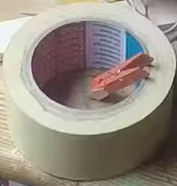

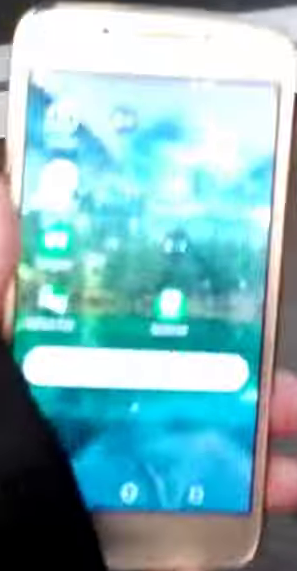

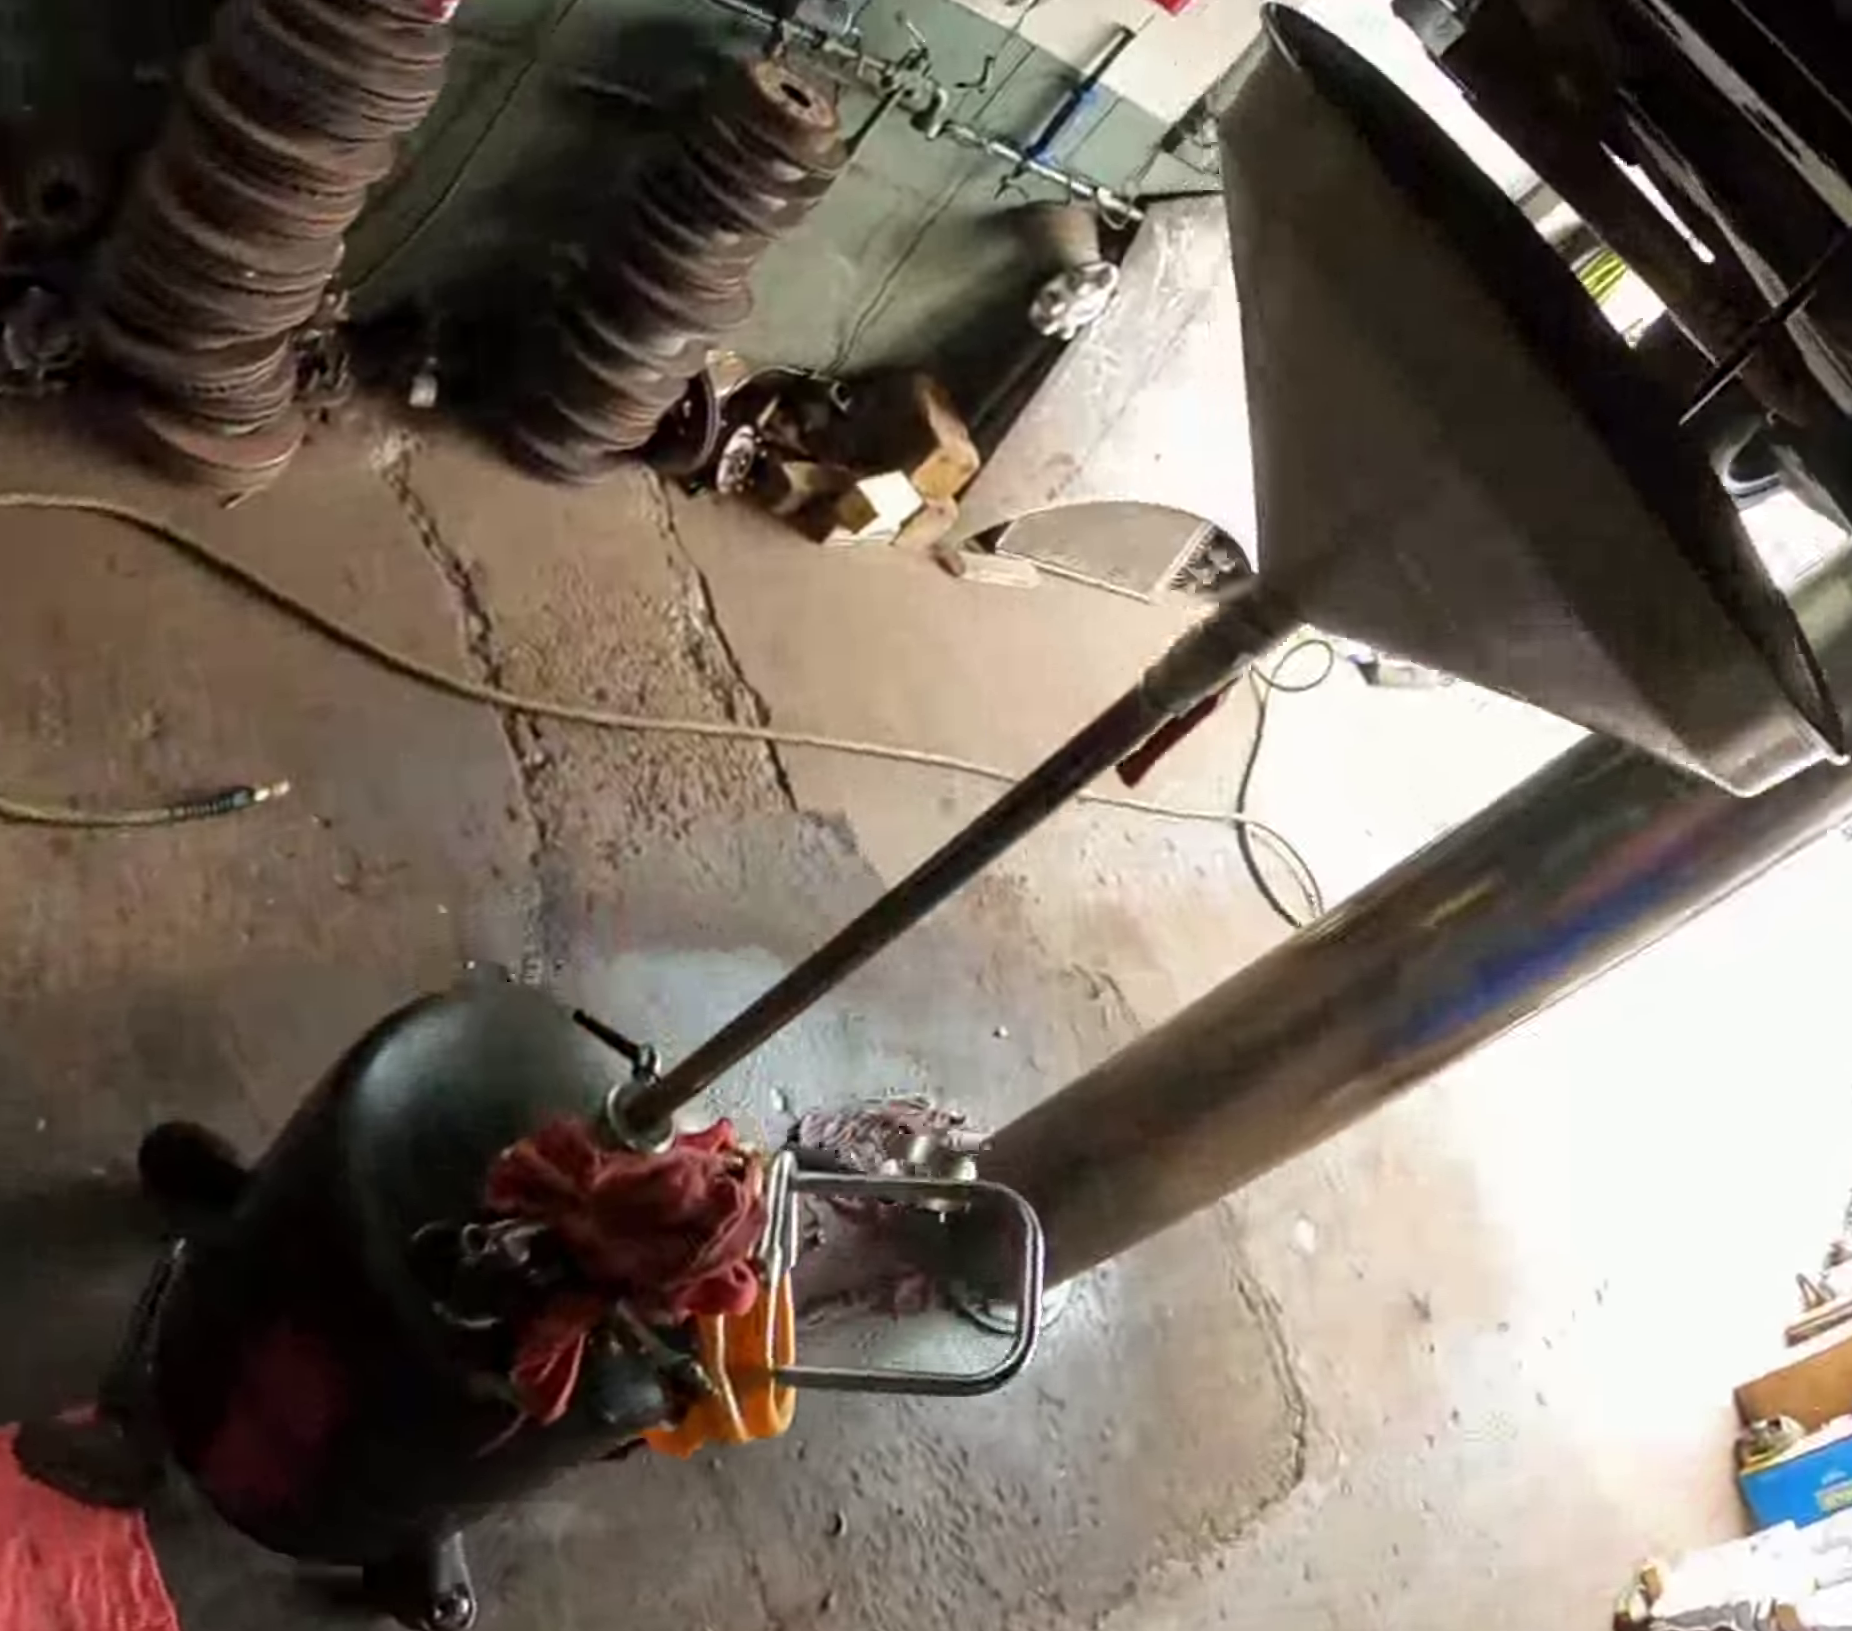

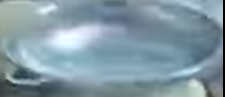

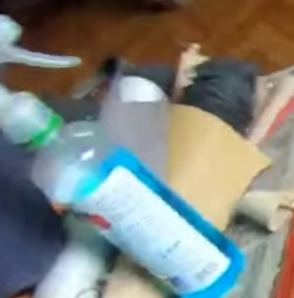

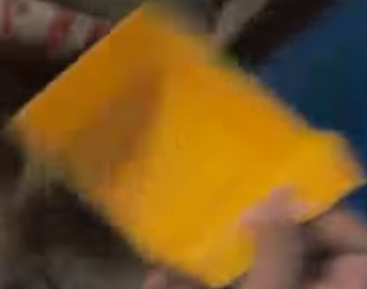

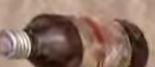

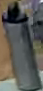

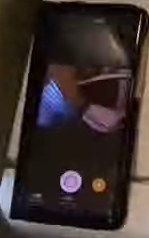

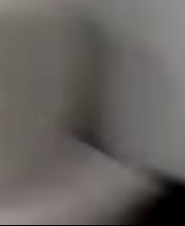

In [8]:
from PIL import Image
from decord import VideoReader

p_clips_dir = Path('/data/datasets/ego4d_data/v2/clips')
p_crop_out_dir = Path('../outputs/ego4d_data/v2/vq2d_crops/queries') / split

for aidx, ann in enumerate(tqdm(all_anns)):
    clip_uid = ann['clip_uid']
    qset_uuid = f"{ann['annotation_uid']}_{ann['query_set']}"
    vc = ann['visual_crop']
    ow, oh = ann['original_width'], ann['original_height']
    object_title = ann['object_title']

    p_obj_dir = p_crop_out_dir / object_title
    p_obj_dir.mkdir(exist_ok=True, parents=True)

    p_clip = p_clips_dir / f'{clip_uid}.mp4'
    vr = VideoReader(str(p_clip))
    frame = vr[min(6*vc['fno'], len(vr)-1)].asnumpy()
    w, h = frame.shape[1], frame.shape[0]
    x1, y1, x2, y2 = vc['x'] / ow * w, vc['y'] / oh * h, (vc['x'] + vc['w']) / ow * w, (vc['y'] + vc['h']) / oh * h
    img = Image.fromarray(frame)
    cropped = img.crop((x1, y1, x2, y2))
    p_out = p_obj_dir / f'{clip_uid}_{vc["fno"]}_{qset_uuid}.jpg'
    cropped.save(p_out)
    if aidx % 500 == 0:
        display(cropped)